Modelling the price of a call option on a zero-coupon bond using Vasicek's model for the short rate and Monte Carlo simulations for the pricing of the option.

The call has the payoff function $$\phi(p(T_1,T_2)) = (p(T_1,T_2))^+$$

where $p(T_1,T_2)$ denotes the price of a zero coupon bond with face value 1 that is paid out at time $T_2$


In Vasicek's model, the instantaneous interest rate is defined by a stochastic differential equation
$$dX_t = \theta(\mu-X_t)dt + \sigma dW_t$$
where $W_t$ is a Wiener process, $\theta$ is the mean reversion coefficient, $\mu$ is the long term mean, and $\sigma$ is the volatility. The initial condition is $X_0 = x_0 \in \mathbb{R}$. 

Another way to write this SDE is $$dr_t = (b-ar_t)dt + \sigma W_t$$

A zero-coupon bond with maturity T under the Vasicek model can be written as a exponential function of the short rate thanks to the properities of the affine term structure.

The price of a zero-coupon bond with maturity $T$ under the Vasicek model can be written as:
$$P(t,T) = A(t,T)e^{-B(t,T)r_t}$$
where $P(t,T)$ is the price of the zcb at time t and $A(t,T)$ and $B(t,T)$ are deterministic functions of time that depend on the paramters in the Vasicek model.

For the Vasicek model, the parameters A and B are defined as:
$$B(t,T)=\frac{1}{a}{1 - e^{-a(T-t)}}$$
$$\frac{(B(t,T)-T+t)(ab-0.5 \sigma^2)}{a^2}-\frac{\sigma^2B^2(t,T)}{4a}$$


Text(0, 0.5, 'Price of $1 zcb')

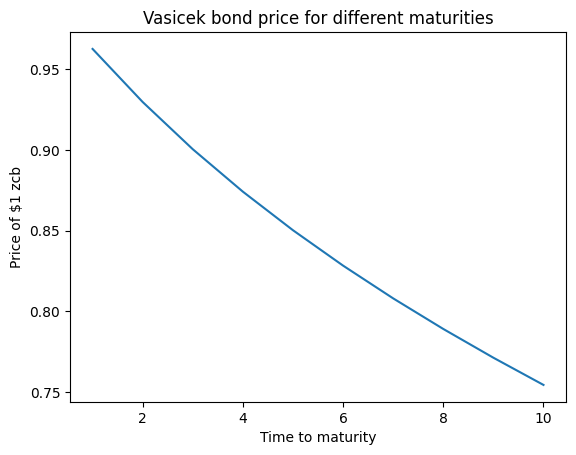

In [18]:
import numpy as np
import matplotlib.pyplot as plt

#Assuming for simplicity that:
r0 = 0.04 #initial interest rate
K = 0.8 #strike price for the option
a = 0.2 #mean reversion speed
b = 0.02 #long-term mean reversion level
sigma = 0.01 #volatility


#Calculating the price of the zcb at time T and plotting price for
#different maturities

def zcbPrice(t,T,r):
    B = (1 - np.exp(-a*(T-t)))/a
    A = ((B-(T-t))*((a**2)*b-(sigma**2)/2))/a**2 - ((sigma**2)*(B**2))/(4*a)
    p = np.exp(A - B*r)
    
    return p

years = [i for i in range(1,T2+1)]
#years.reverse()
prices = [zcbPrice(0,T,r0) for T in range(1,T2+1)]
plt.plot(years, prices)
plt.title("Vasicek bond price for different maturities")
plt.xlabel("Time to maturity")
plt.ylabel("Price of $1 zcb")

To then price the option, Monte Carlo simulations will be used with a weekly time-step

Price for the option with strike 0.5 is: 0.2069


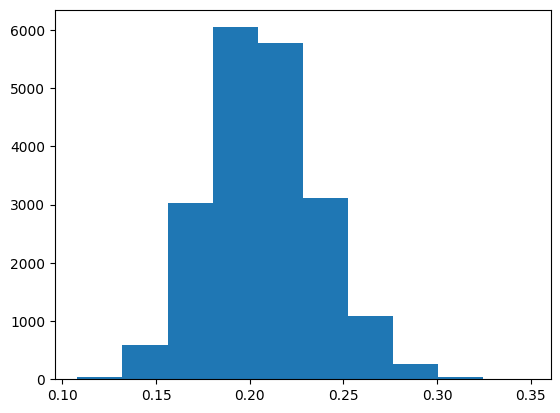

In [24]:
m = 52 #time-steps
K = 0.5 #strike price for the option
r0 = 0.04 #initial interest rate



def vasicek(t,T,iterations):
    #t is the current time, the calculation give the price at this time
    #T is the time OF maturity so if t=5 and T=10 then time to maturity = 5
    
    #Need to simulate values for each week for each year until t
    delta_t = 1/(t*m)
    Z=np.random.standard_normal((100000,t*m))
    payoffs = np.empty(iterations)
    #Simulating the Vasicek short rate
    for i in range(iterations):
        r = np.empty(t*m+1)
        r[0]=r0
        #Simulate the movement of the short rate in iteration i
        for j in range(t*m):
            r[j+1] = np.exp(-a*delta_t)*r[j] + b*(1-np.exp(-a*delta_t)) \
            + np.sqrt(((sigma**2)/(2*a))*(1-np.exp(-2*a*delta_t)))*Z[i,j]

        #Factor to discount the payoffs with
        disc_factor = sum(delta_t*r[:t*m])          
        price = zcbPrice(t,T,r[-1])
        #Payoff for this iteration is the discounted payoff of the option
        payoffs[i] = np.exp(-disc_factor*T)*np.maximum(price-K,0) 
    plt.hist(payoffs)
    return np.mean(payoffs)#= estimated price for option

#Calculate what the price of a 10-year bond will be in 2 years
T1 = 2
T2 = 10
est_price = vasicek(T1,T2, 20000)
print(f"Price for the option with strike {K} is: {round(est_price,4)}")